<a href="https://colab.research.google.com/github/kassio077/Aprendizado-de-maquina-na-pratica/blob/master/Atividade_2_classificador_deteccao_de_intrusao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dados de detcção de intrusão na rede - Classificador**

O Dataset consiste em informações de um ambiente simulado de ataques a uma LAN (Network de Área Local) Militar. A base de dados é composta por 42 atributos e 25192 instâncias que estão classificadas como:


1.   anormaly
2.   normal

Os atributos descrevem se uma conexão representa ou não um ataque de intruso a rede.

Link para o dataset: [link text](https://www.kaggle.com/sampadab17/network-intrusion-detection?select=Train_data.csv)

# 1. Carregando os dados




In [ ]:
from google.colab import drive


import numpy as np
import pandas as pd

dados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/Train_data.csv')

dados.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


# 2. Limpeza e organização dos dados

* Alguns atributos não estão contribuindo para a classificação, pois estão com valores comuns para as instâncias. Por isso aplicamos a remoção de alguns deles.
* O atributo que representa a classificação foi transformado em numérico para ser utilizado em algumas técnicas de análise.
* O atributo **service** foi removido porque apresentava valores muito específicos para cada instância.

In [ ]:
#Remoção dos atributos
dados = dados.drop(columns=['service','land','wrong_fragment','urgent','hot','num_failed_logins',
                            'num_compromised','root_shell','su_attempted','num_root',
                            'num_file_creations','num_shells','num_access_files',
                            'num_outbound_cmds','is_host_login','is_guest_login'])

#Transformando o atributo categorico em numérico.
dados['class'] = dados['class'].replace(['anomaly','normal'],[1,0])

dados['protocol_type'] = dados['protocol_type'].replace(['tcp','udp','icmp'],['001','010','100'])
dados['flag'] = dados['flag'].replace(['SF','S0','REJ','RSTR','SH','RSTO','S1','RSTOS0','S3','S2','OTH'],
                                      ['0001','0010','0100','1000','1111','0011','0110','0101','1100','1110','0111'])









# 3. Preparação dos dados para o classificador


 * Normalizando os atributos numéricos, através da re-escala usando máximo e mínimo.

In [ ]:

dados['duration'] = dados['duration']/dados['duration'].max()

atributos_categoricos = dados.iloc[:,0:3]

#Dataframe apenas com as colunas de atributos numéricos.
atributos_numericos = dados.iloc[:,3:25] 
#Aplicando a re-escala.
atributos_numericos = (atributos_numericos - atributos_numericos.min())/(atributos_numericos.max()-atributos_numericos.min())

atributos_numericos.head(100)





,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,1.286320e-06,0.000000,0.0,0.001961,0.001961,0.0,0.0,0.0,0.0,1.00,0.00,0.00,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,3.824902e-07,0.000000,0.0,0.023529,0.000000,0.0,0.0,0.0,0.0,0.08,0.15,0.00,1.000000,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0.000000e+00,0.000000,0.0,0.239216,0.009804,1.0,1.0,0.0,0.0,0.05,0.07,0.00,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,6.077927e-07,0.001583,1.0,0.007843,0.007843,0.2,0.2,0.0,0.0,1.00,0.00,0.00,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,5.213394e-07,0.000082,1.0,0.056863,0.060784,0.0,0.0,0.0,0.0,1.00,0.00,0.09,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8.029675e-06,0.000064,1.0,0.000000,0.001961,0.0,0.0,0.0,0.0,1.00,0.00,1.00,0.952941,0.466667,0.48,0.02,0.00,0.02,0.01,0.02,0.00,0.00
96,2.672192e-07,0.000020,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1.00,0.00,0.00,0.027451,0.003922,0.14,0.29,0.14,0.00,0.00,0.00,0.00,0.00
97,6.785272e-07,0.000146,1.0,0.005882,0.007843,0.0,0.0,0.0,0.0,1.00,0.00,0.40,0.015686,1.000000,1.00,0.00,0.25,0.03,0.00,0.00,0.00,0.00
98,3.851100e-07,0.000020,0.0,0.001961,0.001961,0.0,0.0,0.0,0.0,1.00,0.00,0.00,1.000000,0.007843,0.01,0.42,0.86,0.00,0.00,0.00,0.00,0.00


* Separando os atributos descritores do atributo classificador.

In [ ]:
#Subconjunto dos atributos descritores
atributos_descritores = pd.merge(atributos_categoricos,atributos_numericos, left_index=True, right_index=True)
atributos_descritores.head(10)


,duration,protocol_type,flag,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,001,0001,1.286320e-06,0.000000,0.0,0.001961,0.001961,0.0,0.0,0.0,0.0,1.00,0.00,0.00,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0.0,010,0001,3.824902e-07,0.000000,0.0,0.023529,0.000000,0.0,0.0,0.0,0.0,0.08,0.15,0.00,1.000000,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0.0,001,0010,0.000000e+00,0.000000,0.0,0.239216,0.009804,1.0,1.0,0.0,0.0,0.05,0.07,0.00,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0.0,001,0001,6.077927e-07,0.001583,1.0,0.007843,0.007843,0.2,0.2,0.0,0.0,1.00,0.00,0.00,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0.0,001,0001,5.213394e-07,0.000082,1.0,0.056863,0.060784,0.0,0.0,0.0,0.0,1.00,0.00,0.09,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.0,001,0100,0.000000e+00,0.000000,0.0,0.235294,0.035294,0.0,0.0,1.0,1.0,0.16,0.06,0.00,1.000000,0.074510,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00
6,0.0,001,0010,0.000000e+00,0.000000,0.0,0.323529,0.015686,1.0,1.0,0.0,0.0,0.05,0.06,0.00,1.000000,0.035294,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00
7,0.0,001,0010,0.000000e+00,0.000000,0.0,0.227451,0.029412,1.0,1.0,0.0,0.0,0.14,0.06,0.00,1.000000,0.058824,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00
8,0.0,001,0010,0.000000e+00,0.000000,0.0,0.527451,0.043137,1.0,1.0,0.0,0.0,0.09,0.05,0.00,1.000000,0.090196,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00
9,0.0,001,0010,0.000000e+00,0.000000,0.0,0.258824,0.013725,1.0,1.0,0.0,0.0,0.06,0.06,0.00,1.000000,0.050980,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00


In [ ]:
#Subconjunto do atributo class
atributo_classificador = dados['class']
atributo_classificador.head()

0    0
1    0
2    1
3    0
4    0
Name: class, dtype: int64

* Aplicando os subconjuntos de dados para treino e teste do classificador.

In [ ]:
from sklearn.model_selection import train_test_split

dados_descritores_train, dados_descritores_test,dados_classificador_train, dados_classificador_test = train_test_split(atributos_descritores,atributo_classificador, test_size=0.2)#random_state=42

#Subconjunto das instâncias com atributos descritores para Treino
dados_descritores_train.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
10510,0.0,001,0001,6.444699e-07,0.000272,1.0,0.047059,0.047059,0.0,0.0,0.0,0.0,1.0,0.0,0.00,1.000000,1.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
12803,0.0,001,0001,6.182719e-07,0.001775,1.0,0.021569,0.021569,0.0,0.0,0.0,0.0,1.0,0.0,0.00,1.000000,1.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
10366,0.0,001,0001,8.461942e-07,0.000908,1.0,0.125490,0.133333,0.0,0.0,0.0,0.0,1.0,0.0,0.06,1.000000,1.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
22722,0.0,001,0001,4.191674e-07,0.001982,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0.019608,1.0,1.0,0.0,0.2,0.02,0.0,0.0,0.0,0.0
17133,0.0,001,0010,0.000000e+00,0.000000,0.0,0.001961,0.001961,0.5,0.5,0.0,0.0,1.0,0.0,0.00,0.007843,1.0,1.0,0.0,1.0,0.01,0.5,0.0,0.0,0.0


In [ ]:
#Valores das instâncias com atributo classificador para treino
dados_classificador_train.head()

10510    0
12803    0
10366    0
22722    0
17133    0
Name: class, dtype: int64

# 4. Definindo o algoritmo de classificação

Os subconjuntos de treino e teste serão aplicados a uma arvore de decisão, para definição do modelo de classificador.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#Definindo modelo
classificador = DecisionTreeClassifier()  

#Treinando o modelo com os atributos descritores e a saida desejada de cada instância
classificador.fit(dados_descritores_train,dados_classificador_train)



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


plt.rcParams["figure.figsize"] = (10,20)

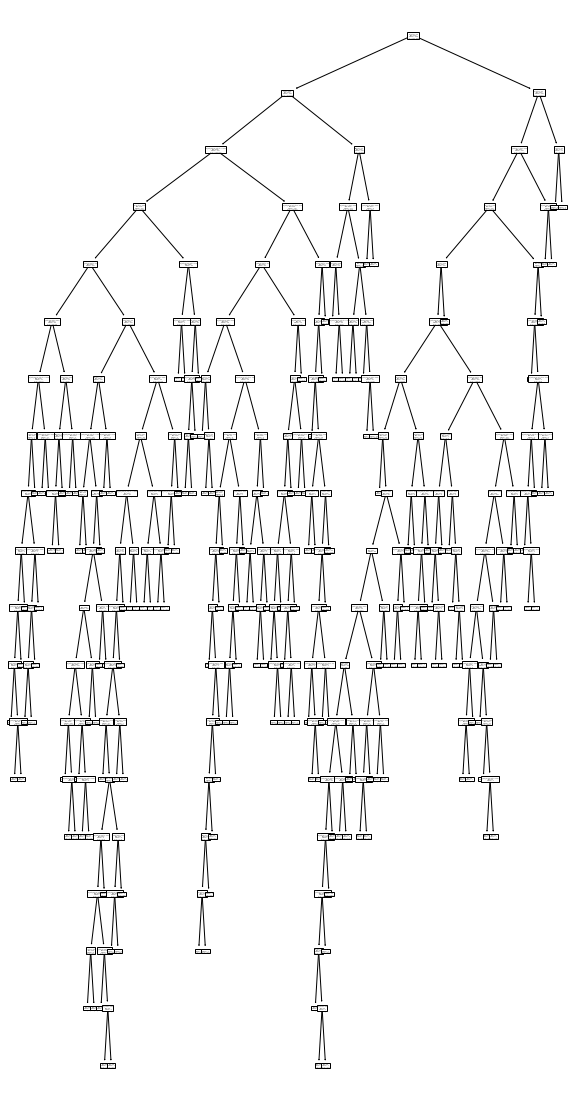

In [ ]:
plot_tree(classificador,feature_names=atributos_descritores.columns[0:25])
plt.show()

In [ ]:
#Aplicando as instâncias de teste no classificador para predizer sua classificação. 
classificacao = classificador.predict(dados_descritores_test)
classificacao

array([0, 1, 1, ..., 0, 0, 0])

In [ ]:
#Comparando os resultados do atributo target(alvo) das primeiras 50 instâncias de teste. 
for i in range(len(dados_classificador_test)-4091):
  print(dados_classificador_test.iloc[i],'\t',classificacao[i])

# 5. Avaliando o classificador

Para o dataset em questão temos como valor para o atributo alvo: positivo (anormaly) e negativo (normal). Eles representam a classificação das instâncias, como uma comunicação anormaly (**1**) ou normal (**0**).

* Métrica da acurácia

Como os dados estão razoavelmente balanceados a métrica da acurácia corresponderá um resultado mais preciso. Após a aplica-lá aos dados, o resultado foi bastante relevante para o classificador mais de 99% das instâncias foram classificadas corretamente.

In [ ]:
#calculando acurácia
from sklearn.metrics import accuracy_score

In [ ]:
acuracia = accuracy_score(dados_classificador_test,classificacao)
acuracia

0.9922603691208574

* Métrica da precisão

Se uma instância do dataset representa uma comunicação a rede LAN como sendo uma comunicação (negativa) **normal** e o classificador predizer como uma instância (positiva) **anomaly**, representando um ataque de intrusão. Isso irá representar uma situação de falso positivo. Se for considerado como um cenário prejudicial a rede, a escolha desta métrica é recomendada.

O resultado do calculo da métrica é um bom resultado caso este cenário seja mais prejudicial:  

In [ ]:
#calculando precisão
from sklearn.metrics import precision_score

In [ ]:
precisao = precision_score(dados_classificador_test,classificacao)
precisao

0.9927194860813704

* Métrica da recall

Para uma instância que representa um ataque de intrusão (positivo) **anomaly** ser considerado pela função de classificação como uma comunicação (negativo) **normal**, pode trazer sérios problemas a rede. Por isso a métrica da recall é mais recomendada para análise do classificador.

A porcentagem de acerto para esta métrica foi quase idêntica em relação a precisão: 


In [ ]:
#calculando recall (revocação)
from sklearn.metrics import recall_score

In [ ]:
recall = recall_score(dados_classificador_test,classificacao)
recall

0.9905982905982906

In [ ]:
#calculando f1-score
from sklearn.metrics import f1_score

In [ ]:
f1 = f1_score(dados_classificador_test,classificacao)
f1

0.9916577540106951

* **Análise da curva ROC**

Utilizando a curva ROC podemos visualizar melhor a razão entre a taxa de positivos verdadeiros (TPR) e positivos falsos (FPR).

In [ ]:
#plotando curva roc
from sklearn.metrics  import roc_curve

In [ ]:
fpr, tpr, _ = roc_curve(dados_classificador_test,classificacao)
fpr

array([0.        , 0.00629863, 1.        ])

In [ ]:
tpr

array([0.        , 0.99059829, 1.        ])

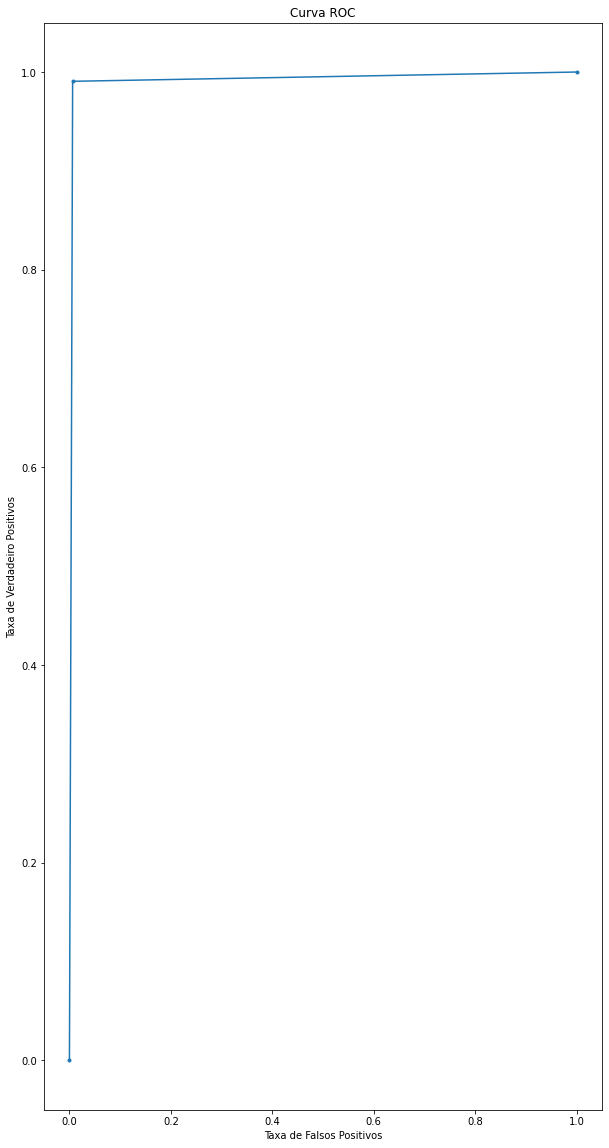

In [ ]:
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()

* Área sob a curva

Como tínhamos verificado com a metrica recall **taxa de verdadeiros positivos** a curva ROC mostra de forma gráfica a curva mais próximo de 1 no eixo y, em relação a **taxa de falsos positivos** eixo x. Confirmando um número maior de instâncias classificadas como verdadeiros positivos. O resultado desta área é calculado a seguir:

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
#calculando area sob a curva ROC
auc = roc_auc_score(dados_classificador_test,classificacao)
round(auc,3)

0.992

* **Validação cruzada**

Como os dados para as métricas anteriores utilizadas foram aleatorizados pela divisão do dataset, não podemos afirmar com certeza a qualidade deste modelo de classificador para novas instâncias que surgirem. Por isso utilizamos a validação cruzada para avaliar um número maior de subconjuntos de dados do dataset, em busca de um modelo mais generalizado.

* Avaliando o modelo

In [ ]:
# avaliando modelo com cross validation
from sklearn.model_selection import cross_val_score

In [ ]:
#definindo o modelo
classificador = DecisionTreeClassifier()

In [ ]:
#calculando os scores
scores = cross_val_score(classificador,atributos_descritores,atributo_classificador,cv=10)
scores

array([0.99484127, 0.99404762, 0.99285431, 0.99245732, 0.99166336,
       0.99444224, 0.99245732, 0.99047241, 0.99364827, 0.9952362 ])

In [ ]:
#média dos scores dos subconjutos
scores.mean(),scores.std()

(0.9932120329936923, 0.001425646074932422)

# 7. Comparando Árvore de Decisão com Random Forest

* **Método Holdout**

* Árvore de decisão

In [ ]:
arvore = DecisionTreeClassifier() 

arvore.fit(dados_descritores_train,dados_classificador_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
arvore.score(dados_descritores_test, dados_classificador_test)

0.9922603691208574

* Random forest

In [ ]:
#definindo random forest
from sklearn.ensemble import RandomForestClassifier

floresta = RandomForestClassifier(n_estimators=100)

floresta.fit(dados_descritores_train,dados_classificador_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#calculando acurácia da random forest
floresta.score(dados_descritores_test,dados_classificador_test)

0.9962294105973407